# Clustering
- Fabian Oppermann
- Philipp Hasel
- Petruta-Denisa Biholari

> Der Datensatz bezieht sich auf Kunden eines Großhändlers. Er umfasst die jährlichen Ausgaben in Geldeinheiten (m.u.) für verschiedene Produktkategorien.

URL: https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set
Anzahl der Instanzen: 440

---
## Datensatzbeschreibung
- **Channel**: Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal))
- **Region**: Lisnon, Oporto or Other (Nominal)
- **Fresh**: annual spending on fresh products (Continuous)
- **Milk**: annual spending on milk products (Continuous)
- **Grocery**: annual spendingon grocery products (Continuous)
- **Frozen**: annual spendingon frozen products (Continuous)
- **Detergents_Paper**: annual spending on detergents and paper products (Continuous)
- **Delicassen**: annual spendingon and delicatessen products (Continuous)

---

# 1. Datenvorschau

In [7]:
import pandas as pd

# Laden der Daten
data = pd.read_csv('./Wholesale customers data.csv')
print("="*100)
print("🔎 Datenvorschau:")
print("="*100)
print(data.head())
print("-"*100)
print("\n📊 Statistische Übersicht:")
print(data.describe())
print("-"*100)
print("\n❌ Fehlende Werte:")
print(data.isnull().sum())

🔎 Datenvorschau:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
----------------------------------------------------------------------------------------------------

📊 Statistische Übersicht:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
2

### Beobachtung der Daten
Wir können erkennen, dass keine Daten fehlen oder NULL sind. Die Datenvorbereitung ist somit nicht notwendig oder nur minimal.
Weiteres können wir sehen, dass es **440 Einträge** mit **8 Attributen** gibt. Zwei der Attribute sind **nominal** (Channel und Region), die restlichen sind **kontinuierlich**.

---

# 2. Pairplott inkl. Diskussion

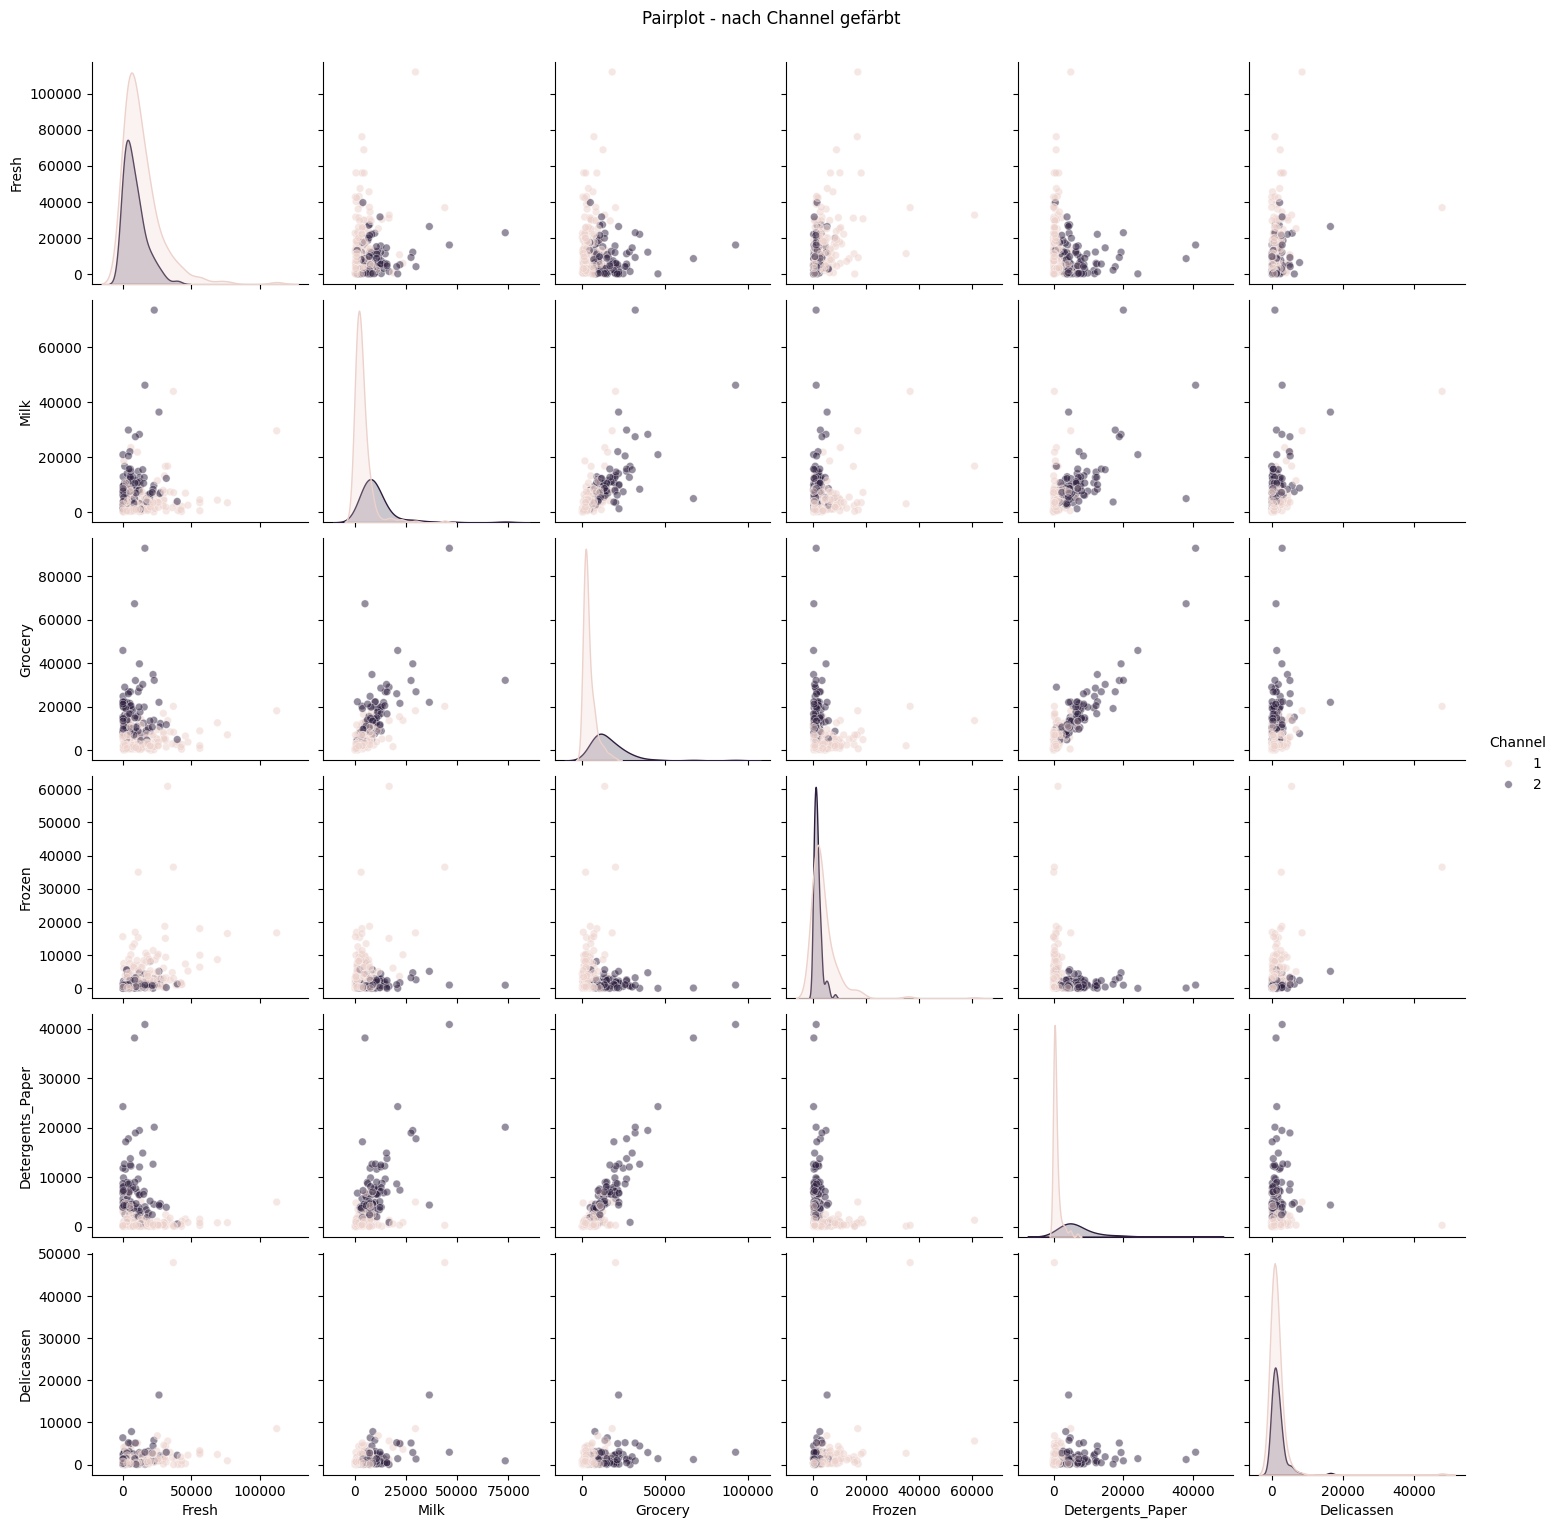

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

const_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

sampled = data.sample(min(300, len(data)), random_state=42)
sns.pairplot(sampled, vars=const_cols, hue="Channel", diag_kind="kde", plot_kws={"alpha":0.5, "s":30})
plt.suptitle("Pairplot - nach Channel gefärbt", y=1.02)
plt.show()

### Beobachtung aus Pairplot
- Die Daten sind rechtsschief verteilt.
    - Wenig große Kunden kaufen sehr viel, die meisten wenig.
- Channel 2 hat tendenziell höhere Werte bei "Milk", "Grocery" und "Detergants_Paper"
- Channel 1 hat höhere Werte bei "Fresh" und "Frozen"

=> **Typisch** für Einzelhandel-Kunden



- Zwischen "Grocery", "Milk" und "Detergents_Paper" gibt es eine starke Korrelation
    - Kunden, die viel in einem dieser Bereiche ausgeben, geben auch in den anderen beiden Bereichen viel aus.
- Zwischen "Fresh" und den anderen Variablen besteht wenig Korrelation
    - Kunden, die viel in "Fresh" ausgeben, haben nicht zwangsläufig hohe Ausgaben in den anderen Bereichen.

=> **Typisch** für Gastronomie-Kunden

---

Der Pairplot zeigt klar zwei unterschiedliche Einkaufsverhalten:

- Channel 1 => frische Produkte, geringere Gesamtumsätze.
- Channel 2 => verarbeitete Produkte, starke Korrelationen zwischen Kategorien.

---

Wir werden uns auf `Fresh, Milk, Grocery, Detergents_Paper` konzentrieren.

# 3. Datenvorbereitung

Die Daten sind sehr rechtsschief verteilt. Wir wenden eine Log-Transformation, Standardisierung und Skalierung an, um die Verteilung zu normalisieren.

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler 

cols_for_clustering = ['Fresh', 'Frozen', 'Grocery', 'Delicassen']
df_cluster = data[cols_for_clustering].copy()

df_log = np.log1p(df_cluster)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

df_prepared = pd.DataFrame(df_scaled, columns=cols_for_clustering)
print("="*100)
print("🔎 Datenvorschau nach Vorbereitung:")
print(df_prepared.head())
print("-"*100)
print("\n📊 Statistische Übersicht nach Vorbereitung:")
print(df_prepared.describe())

🔎 Datenvorschau nach Vorbereitung:
      Fresh    Frozen   Grocery  Delicassen
0  0.486184 -1.509250  0.440155    0.408966
1  0.087889  0.134052  0.652171    0.627926
2  0.016356  0.376899  0.454687    1.776833
3  0.517477  1.141574 -0.084792    0.633133
4  0.880631  0.757322  0.395847    1.456588
----------------------------------------------------------------------------------------------------

📊 Statistische Übersicht nach Vorbereitung:
              Fresh        Frozen       Grocery    Delicassen
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02
mean   3.229740e-17  2.987509e-16 -1.081963e-15 -2.220446e-17
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00
min   -5.001217e+00 -3.159118e+00 -6.355190e+00 -4.088856e+00
25%   -4.659360e-01 -5.405240e-01 -6.909415e-01 -5.081462e-01
50%    2.148413e-01  2.180154e-02  2.257341e-02  1.567407e-01
75%    6.836939e-01  6.818408e-01  7.491423e-01  6.469559e-01
max    1.970662e+00  2.900093e+00  2.698281e+00  3.177354e+